In [128]:
%pip install -r requirements.txt


[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: pip3.12 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [36]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [37]:
image_matrix = imread("cat.jpg").astype(float)

In [38]:
def plot_diff(X, X_changed, title):
    if X.dtype != np.uint8 or X_changed.dtype != np.uint8:
        X = X / 255.0
        X_changed = X_changed / 255.0

    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(X)
    ax[0].axis('off')
    ax[0].set_title("Before changes")

    ax[1].imshow(X_changed)
    ax[1].axis('off')
    ax[1].set_title("After changes")

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

In [39]:
def stretch(X, a, b):
    X_cp = X.copy()
    h, w, c = X_cp.shape
    y, x = np.indices((h, w))
    coords = np.vstack((x.ravel(), y.ravel()))
    transformation = np.array([[a, 0 ], [0,b]])
    new_coords = transformation @ coords

    min_x, min_y = new_coords.min(axis=1)
    new_coords[0] -= min_x
    new_coords[1] -= min_y

    max_x, max_y = new_coords.max(axis=1)
    new_w = int(np.ceil(max_x)) + 1
    new_h = int(np.ceil(max_y)) + 1

    stretched = np.zeros((new_h, new_w, c), dtype=X.dtype)

    new_x = np.round(new_coords[0]).astype(int)
    new_y = np.round(new_coords[1]).astype(int)
    mask = (new_x >= 0) & (new_x < new_w) & (new_y >= 0) & (new_y < new_h)

    for ch in range(c):
        stretched[new_y[mask], new_x[mask], ch] = X_cp[..., ch].ravel()

    return plot_diff(X, stretched, "Stretched image")

In [40]:
def shear(X, a, b):
    X_cp = X.copy()
    h, w, c = X_cp.shape
    y, x = np.indices((h, w))
    coords = np.vstack((x.ravel(), y.ravel()))
    transformation = np.array([[1, a ], [b,1]])
    new_coords = transformation @ coords

    min_x, min_y = new_coords.min(axis=1)
    new_coords[0] -= min_x
    new_coords[1] -= min_y

    max_x, max_y = new_coords.max(axis=1)
    new_w = int(np.ceil(max_x)) + 1
    new_h = int(np.ceil(max_y)) + 1

    sheared = np.zeros((new_h, new_w, c), dtype=X.dtype)

    new_x = np.round(new_coords[0]).astype(int)
    new_y = np.round(new_coords[1]).astype(int)
    mask = (new_x >= 0) & (new_x < new_w) & (new_y >= 0) & (new_y < new_h)

    for ch in range(c):
        sheared[new_y[mask], new_x[mask], ch] = X_cp[..., ch].ravel()

    return plot_diff(X, sheared, "Sheared image")

In [41]:
def reflection(X, a, b):
    X_cp = X.copy()
    h, w, c = X_cp.shape
    y, x = np.indices((h, w))
    coords = np.vstack((x.ravel(), y.ravel()))
    denominator = (a ** 2 + b ** 2)
    transformation = (1/denominator)*np.array([[a**2 - b**2, 2*a*b],[2*a*b, b**2 - a**2]])
    new_coords = transformation @ coords

    min_x, min_y = new_coords.min(axis=1)
    new_coords[0] -= min_x
    new_coords[1] -= min_y

    max_x, max_y = new_coords.max(axis=1)
    new_w = int(np.ceil(max_x)) + 1
    new_h = int(np.ceil(max_y)) + 1

    reflected = np.zeros((new_h, new_w, c), dtype=X.dtype)

    new_x = np.round(new_coords[0]).astype(int)
    new_y = np.round(new_coords[1]).astype(int)
    mask = (new_x >= 0) & (new_x < new_w) & (new_y >= 0) & (new_y < new_h)

    for ch in range(c):
        reflected[new_y[mask], new_x[mask], ch] = X_cp[..., ch].ravel()

    return plot_diff(X, reflected, "Reflected image")

In [42]:
def rotation(X,theta):
    X_cp = X.copy()
    h, w, c = X_cp.shape
    cx, cy = w / 2, h / 2
    y, x = np.indices((h, w))
    coords = np.vstack((x.ravel() - cx, y.ravel() - cy))
    transformation = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
    new_coords = transformation @ coords
    new_coords[0] += cx
    new_coords[1] += cy

    new_x = np.round(new_coords[0]).astype(int)
    new_y = np.round(new_coords[1]).astype(int)

    mask = (0 <= new_x) & (new_x < w) & (0 <= new_y) & (new_y < h)

    rotated = np.zeros_like(X_cp)
    for ch in range(c):
        rotated[new_y[mask], new_x[mask], ch] = X_cp[y.ravel()[mask], x.ravel()[mask], ch]


    return plot_diff(X, rotated, "Rotated image")

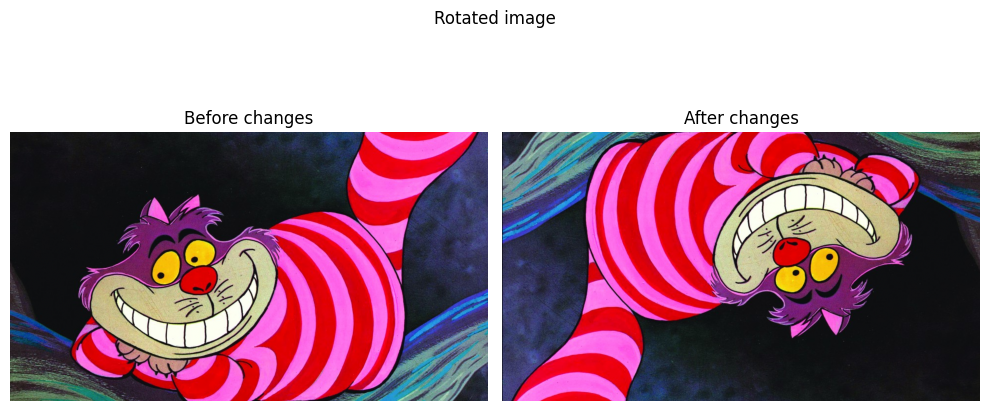

In [43]:
rotation(image_matrix, np.pi)